### 1. Efficient Python programming for lists of same-type objects:

a) Find an efficient way to determine the mean and the position of minimum and maximum values in a long list of random numbers.

In [1]:
# Each of these are easily computed in O(n) time by a linear scan over the list
def mean(lst):
  s = 0
  for x in lst:
    s += x
  return s / len(lst)

def minimum_index(lst):
  min_i = 0
  for i in range(len(lst)):
    if lst[i] < lst[min_i]:
      min_i = i
  return min_i

def maximum_index(lst):
  max_i = 0
  for i in range(len(lst)):
    if lst[i] > lst[max_i]:
      max_i = i
  return max_i

b) Given $N$ random numbers $a_j$, evenly distributed between $-1$ and $1$, find an efficient way to obtain regularized numbers $x_j$ given by $x_j = \bar{a} + \sigma$ for $a_j > \bar{a} + \sigma$; $x_j = \bar{a} - \sigma$ for $a_j < \bar{a} - \sigma$; $x_j = a_j$ else. Here, $\bar{a}$ is the mean value of the sample and $\sigma$ the standard deviation.

In [2]:
# Compute the standard deviation, also returning the mean to avoid redundant work
def mean_and_std(lst):
  m = mean(lst)
  s = 0
  for x in lst:
    s += (x - m)**2
  s = (s / len(lst))**0.5
  return m, s

# First compute the mean and standard deviation in O(n) time, then do one more scan over the list
def regularized(a):
  m, s = mean_and_std(a)
  x = a
  for j in range(len(a)):
    x[j] = min(m + s, max(m - s, a[j]))
  return x

### 2. The following 2-qubit circuits shall be programmed using 3 different frameworks: i) using QISkit; ii) using Cirq; iii) using Pennylane; For each circuit extract the final state vector (before any measurement) and create a frequency plot from sampling the circuits (measurement of all qubits) 100 times.
* create a circuit with $H$-gate and $Z$-gate acting on the first qubit and $X$-gate and $H$-gate acting on the second qubit;
* create the Bell states $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
* create the Bell states $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ and $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

### i) Qiskit

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from IPython.display import display

In [4]:
def get_statevector_and_measure(circuit):
  backend = Aer.get_backend('statevector_simulator')
  statevector = backend.run(circuit).result().get_statevector()
  circuit.measure([0, 1], [0, 1])
  job = backend.run(circuit, shots=100).result()
  return statevector, job.get_counts()

def circuit_plots(circuit):
  statevector, measurement = get_statevector_and_measure(circuit)
  display(circuit.draw(output='mpl'))
  print(statevector)
  display(plot_histogram(measurement, color='midnightblue', title=''))

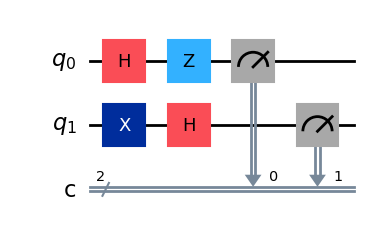

Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
              0.5-6.123234e-17j],
            dims=(2, 2))


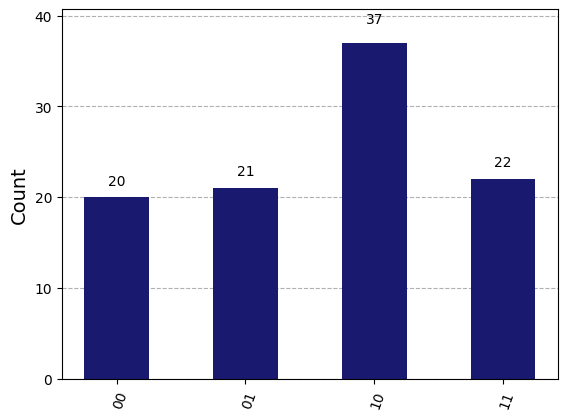

In [5]:
# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.z(0)
qc.x(1)
qc.h(1)

circuit_plots(qc)

##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

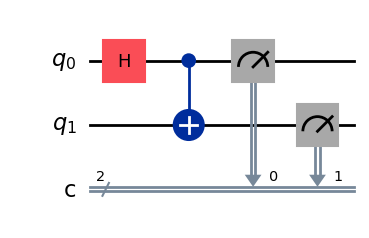

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


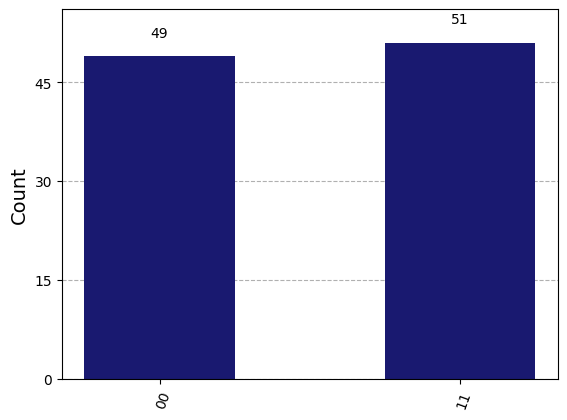

In [6]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc)

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

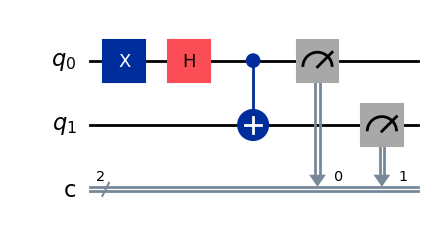

Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j],
            dims=(2, 2))


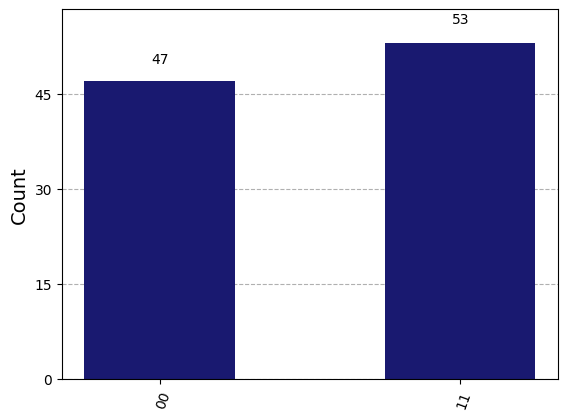

In [7]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc)

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

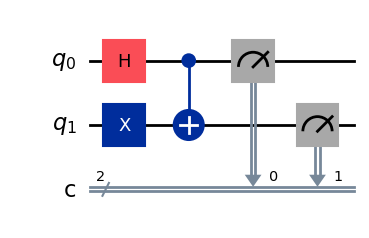

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


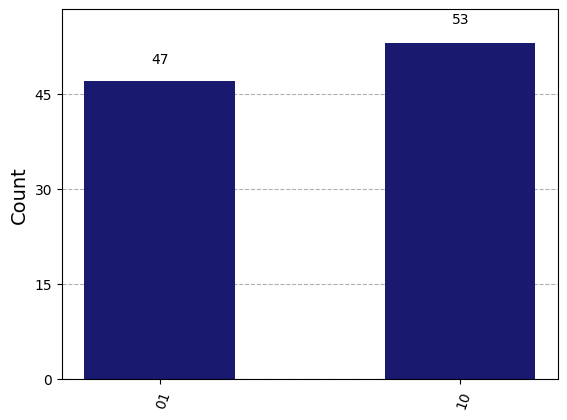

In [8]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc)

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

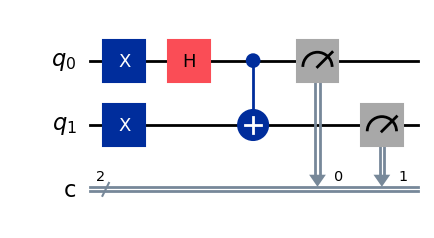

Statevector([ 0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j,
              0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2))


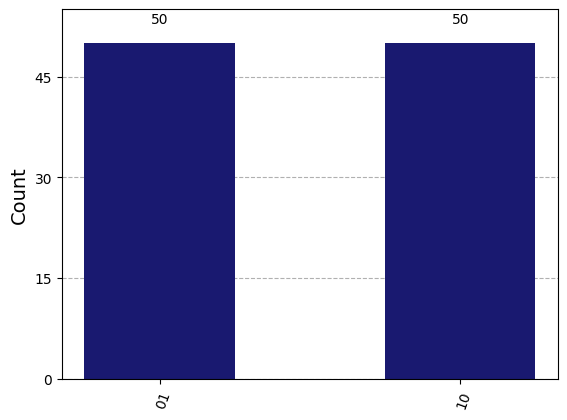

In [9]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc)

### ii) Cirq

In [10]:
import cirq

In [11]:
# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.Z(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.H(qubits[1]))

print(circuit)

cirq_s = cirq.Simulator()

print('Simulate the circuit:')
results = cirq_s.simulate(circuit)
print(results)

0: ───H───Z───

1: ───X───H───
Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: 0.707|0⟩ - 0.707|1⟩

qubits: (cirq.LineQubit(1),)
output vector: 0.707|0⟩ - 0.707|1⟩

phase:
output vector: |⟩


##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

In [12]:
# TODO

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

In [13]:
# TODO

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

In [14]:
# TODO

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

In [15]:
# TODO

### iii) Pennylane

In [16]:
import pennylane as qml
import matplotlib.pyplot as plt

Statevector:  [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes:>)


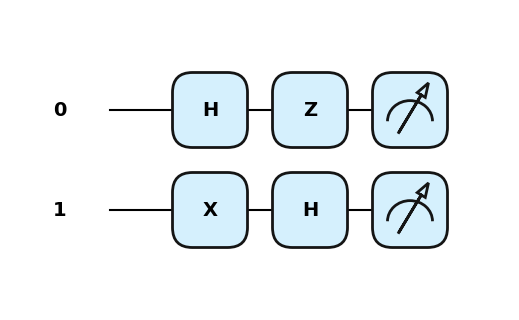

In [17]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

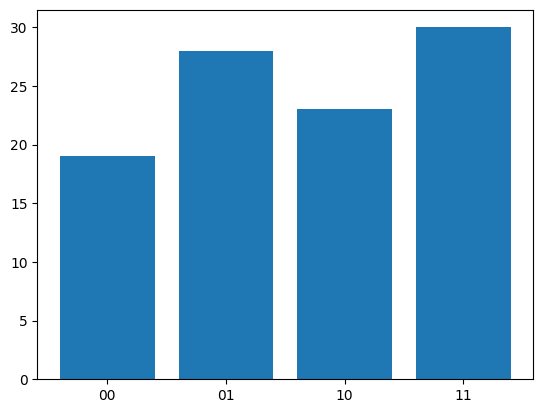

In [18]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.show()

##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

Statevector:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes:>)


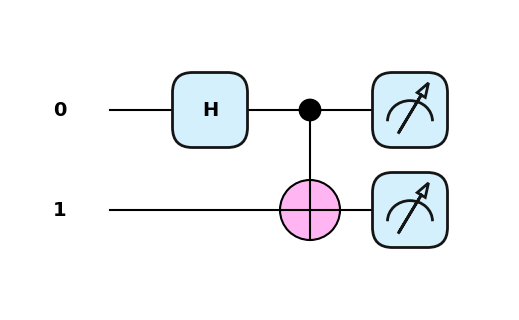

In [19]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

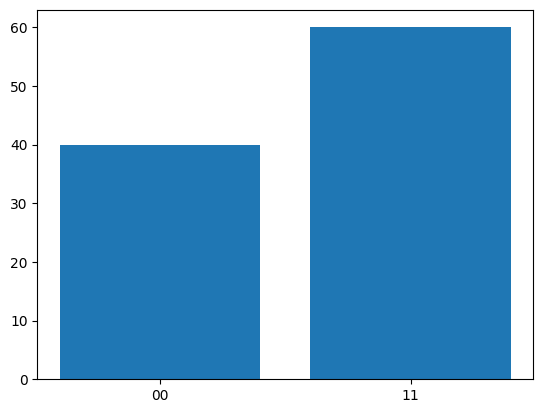

In [20]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.show()

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

Statevector:  [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]

Circuit
(<Figure size 600x300 with 1 Axes>, <Axes:>)


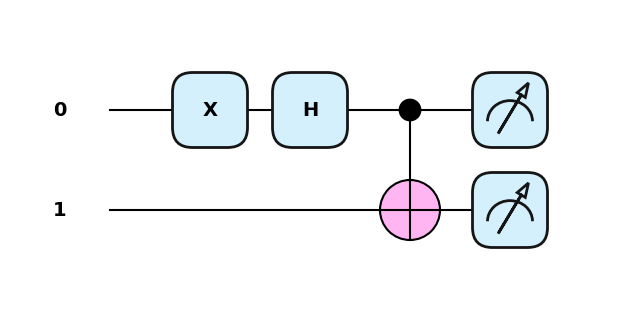

In [21]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

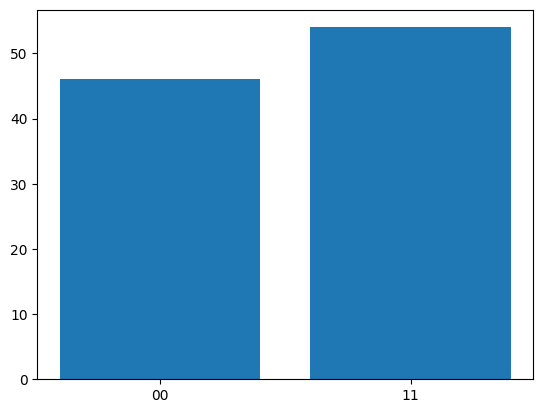

In [22]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.show()

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

Statevector:  [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes:>)


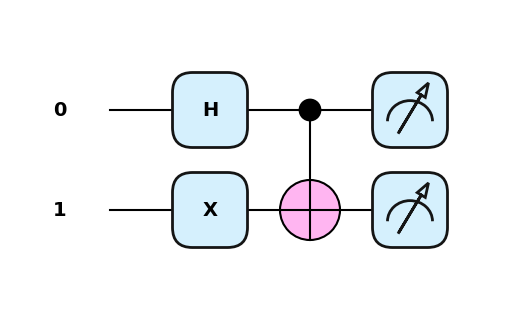

In [23]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

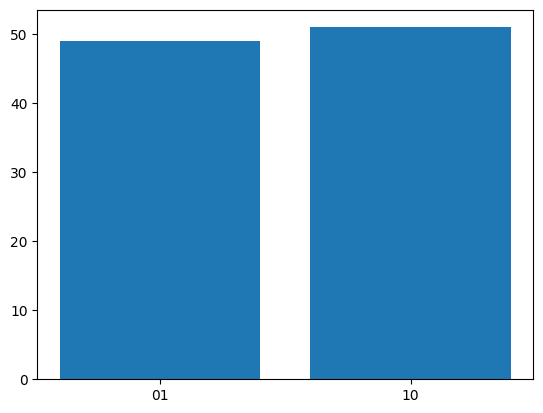

In [24]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.show()

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

Statevector:  [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]

Circuit
(<Figure size 600x300 with 1 Axes>, <Axes:>)


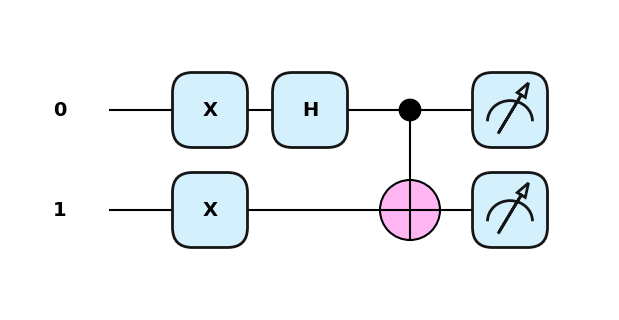

In [25]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

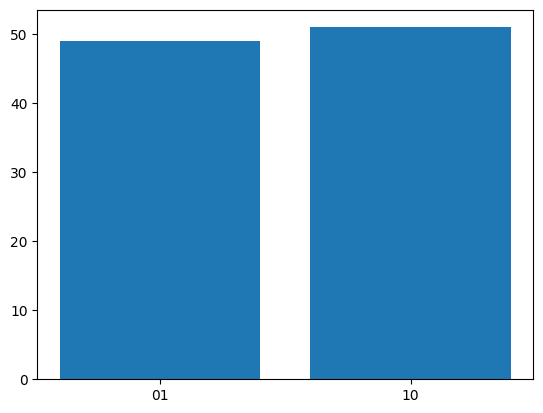

In [26]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.show()

### 3) Using the parametrized QISkit circuit for quantum teleportation, investigate whether any arbitrary payload qubit can be teleported.

First try a few states with complex amplitudes and/or rotation angles and compare the resulting state with the payload state vector.

Then describe mathematically how the state vector of the system evolves from the Bell state $|q_Aq_B\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and arbitrary payload state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ to the final state; argue why Bob has to apply $X$ and $Z$ gates depending on the outcome of Alice's measurements of her qubits.

In [27]:
# TODO